# Классификация клиентов банка - прогнозирование оттока. 
## Метрики классификаций.

Основные задачи:
1. Обучение моделей
2. Прогнозирование
3. Проведение сравнительного анализа (с помощью метрик классификаций)
4. Определение лучшей модели классификации.

In [97]:
import pandas as pd

In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [99]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

from sklearn.metrics import RocCurveDisplay

### Загрузка датасета, заранее проанализированного

In [100]:
df = pd.read_csv('analyzed_churn_modelling.csv', sep = ',')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,2
8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0,0
9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Geography_num    10000 non-null  int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 1.1+ MB


In [102]:
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.749500
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.830433
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,2.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000


### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [103]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
geography_cols.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [104]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']

In [105]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([df[features_names], geography_cols], axis = 1)
X.shape

(10000, 12)

In [106]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [107]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']

#### Разделение набора данных на обучающую и тестовую выборки

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [109]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6700, 12) (3300, 12) (6700,) (3300,)


### KNeighborsClassifier (Классификация ближайших соседей)

In [110]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 37 ms


KNeighborsClassifier()

In [111]:
# применение обученной модели к тестовой выборке
knn.predict(X_test)

#вектор предсказанных классов в переменной
knn_pred_test = knn.predict(X_test)

### Метрики классификаций

#### Confusion matrix (матрица ошибок)
это таблица, которая показывает, как часто модель классификации делает правильные и неправильные предсказания для каждого класса. Строки матрицы соответствуют фактическим (истинным) классам, а столбцы - предсказанным классам.

In [112]:
knn_cm = confusion_matrix(y_test, knn_pred_test)

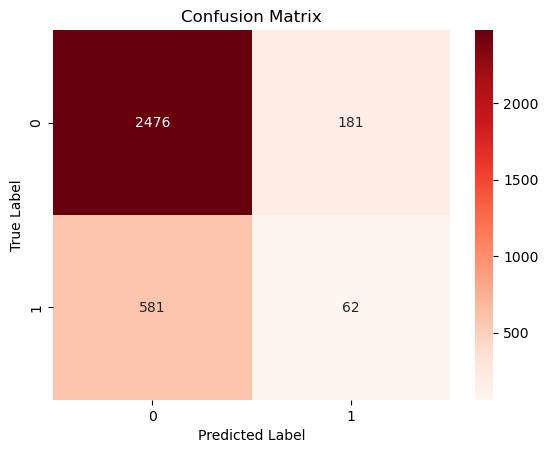

In [113]:
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Accuracy(точность)
это доля правильно классифицированных объектов среди всех объектов, т.е. какая доля предсказанных положительных примеров действительно является положительными. 

###### Если значение ближе к 1 - высокая точность модели

In [114]:
knn_accuracy = accuracy_score(y_test, knn_pred_test, normalize=True)
knn_accuracy

0.769090909090909

#### Error rate (доля ошибочных классификаций)
это мера того, насколько модель плохо справляется с задачей.
Процентная доля неправильно классифицированных примеров в тестовой выборке.

###### Чем меньше значение, тем лучше модель.

In [115]:
knn_error_rate = 1 - knn_accuracy
knn_error_rate

0.23090909090909095

__Precision (точность)__ показывает, какая доля объектов, отнесенных моделью к некоторому классу, действительно принадлежит этому классу.

Precision показывает, какая доля предсказанных положительных примеров действительно является положительными.

Это важно в задачах, где ложноположительные ошибки могут быть дорогостоящими, например, в медицинской диагностике.

In [116]:
knn_precision = precision_score(y_test, knn_pred_test)
knn_precision

0.2551440329218107

#### Recall (полнота/чувствительность)
измеряет, какую долю реальных положительных примеров модель смогла правильно предсказать.

Проще говоря, она показывает, насколько хорошо модель улавливает все реальные положительные случаи.

Это важно в задачах, где пропуск положительных примеров может быть критичным, например, в обнаружении мошенничества.

###### Если значение ближе к 1 - высокая полнота модели

In [117]:
knn_recall = recall_score(y_test, knn_pred_test)
knn_recall

0.09642301710730948

#### F1-score
это метрика, которая комбинирует точность (precision) и полноту (recall). Она учитывает оба этих параметра и находит некоторый баланс между ними.

Когда важна F1-мера: Например, в системе детектирования мошенничества, где важно как уловить все случаи мошенничества (высокая полнота), так и не блокировать слишком много законных операций (высокая точность).

###### Значение ближе к 1 - высокая сбалансированность модели
хорошо и улавливает истинные положительные примеры, и не делает много ложноположительных предсказаний.


• Точность (precision): Доля правильно классифицированных положительных примеров среди всех предсказанных положительных примеров.

• Полнота (recall): Доля правильно классифицированных положительных примеров среди всех истинных положительных примеров.

In [118]:
knn_f1=f1_score(y_test, knn_pred_test)
knn_f1

0.1399548532731377

#### Отчёт о классификации для модели KNN на тестовой выборке

In [119]:
print(classification_report( y_test, knn_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2657
           1       0.26      0.10      0.14       643

    accuracy                           0.77      3300
   macro avg       0.53      0.51      0.50      3300
weighted avg       0.70      0.77      0.73      3300



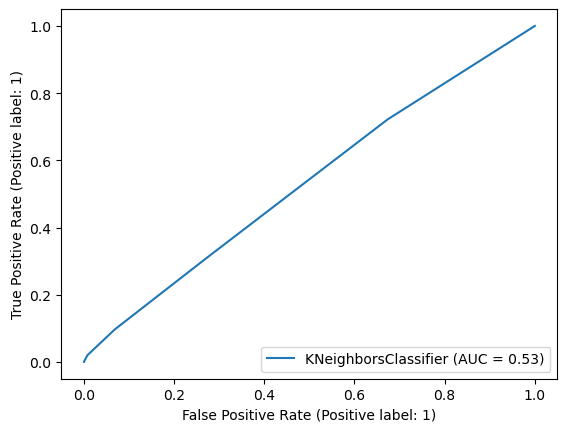

In [120]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

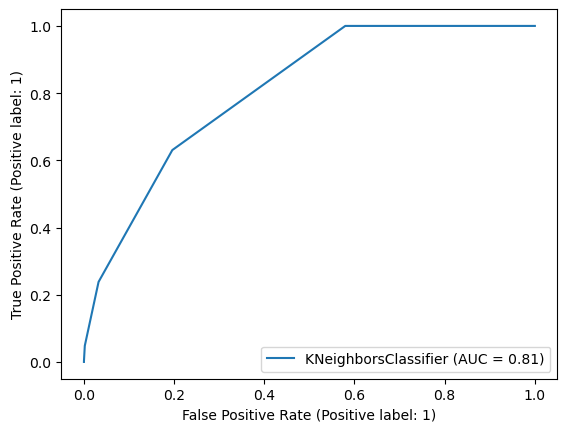

In [121]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

#### Качество прогнозов модели на тестовых данных с помощью ROC кривой сопоставимо случайному угадыванию, чего не скажешь об ROC кривой на тренировочных данных, у которой нормальное предсказание.

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [122]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 15.6 ms
Wall time: 9.54 ms


GaussianNB()

In [123]:
gnb_pred_test = gnb.predict(X_test)

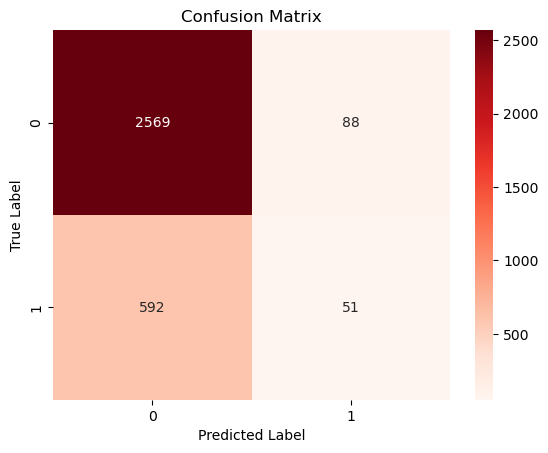

In [124]:
gnb_cm = confusion_matrix(y_test, gnb_pred_test)
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [125]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test, normalize=True)
gnb_error_rate = 1 - gnb_accuracy
gnb_precision = precision_score(y_test, gnb_pred_test)
gnb_recall = recall_score(y_test, gnb_pred_test)
gnb_f1 = f1_score(y_test, gnb_pred_test)

# отчёт классификации для модели GNB на тестовой выборке
print(classification_report( y_test, gnb_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2657
           1       0.37      0.08      0.13       643

    accuracy                           0.79      3300
   macro avg       0.59      0.52      0.51      3300
weighted avg       0.73      0.79      0.74      3300



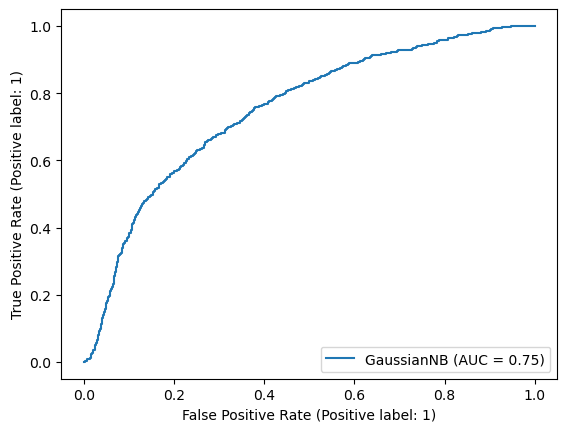

In [126]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

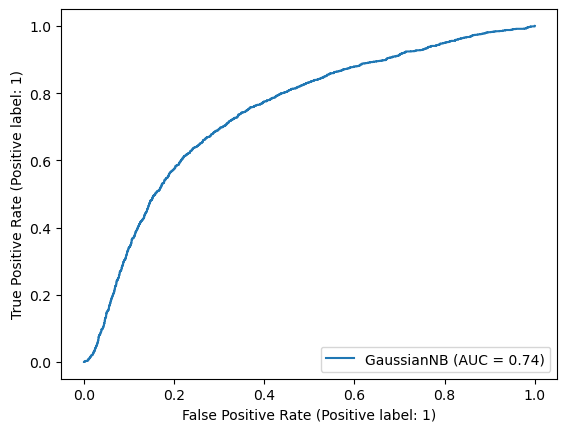

In [127]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

AUC чуть больше 0.70, говорит о том, что качество модели хорошее

### Random Forest Classifier (Классификатор дерева решений)

In [128]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 1.81 s
Wall time: 461 ms


In [129]:
rfc_pred_test = rfc.predict(X_test)

In [130]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test, normalize=True)
rfc_error_rate = 1 - rfc_accuracy
rfc_precision = precision_score(y_test, rfc_pred_test)
rfc_recall = recall_score(y_test, rfc_pred_test)
rfc_f1 = f1_score(y_test, rfc_pred_test)

# отчёт классификации для модели GNB на тестовой выборке
print(classification_report( y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.80      0.45      0.58       643

    accuracy                           0.87      3300
   macro avg       0.84      0.71      0.75      3300
weighted avg       0.86      0.87      0.86      3300



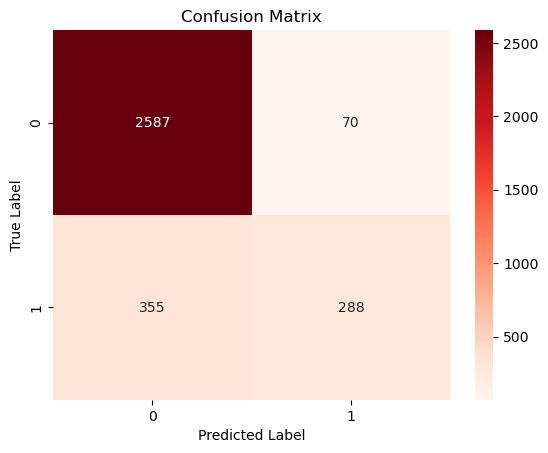

In [131]:
rfc_cm = confusion_matrix(y_test, rfc_pred_test)
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

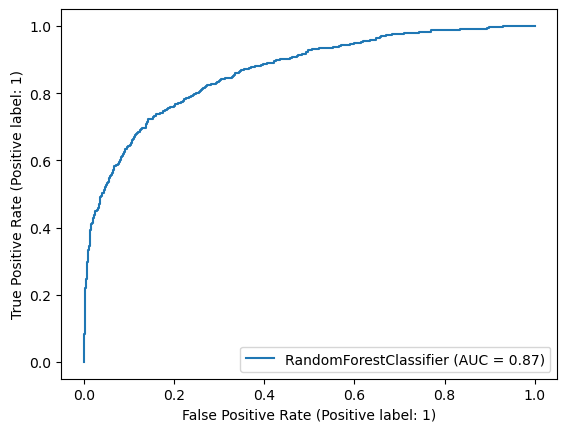

In [132]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

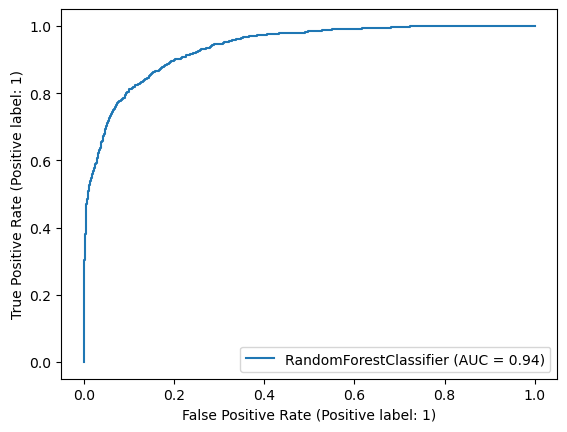

In [133]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

На данный момент самая идеальная модель 

### Logistic Regression (Логистическая регрессия)

In [134]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 10.1 ms


LogisticRegression(random_state=42)

In [136]:
lr_pred_test = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred_test, normalize=True)
lr_error_rate = 1 - lr_accuracy
lr_precision = precision_score(y_test, lr_pred_test)
lr_recall = recall_score(y_test, lr_pred_test)
lr_f1 = f1_score(y_test, lr_pred_test)

# отчёт классификации для модели GNB на тестовой выборке
print(classification_report( y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.54      0.21      0.30       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.60      3300
weighted avg       0.78      0.81      0.78      3300



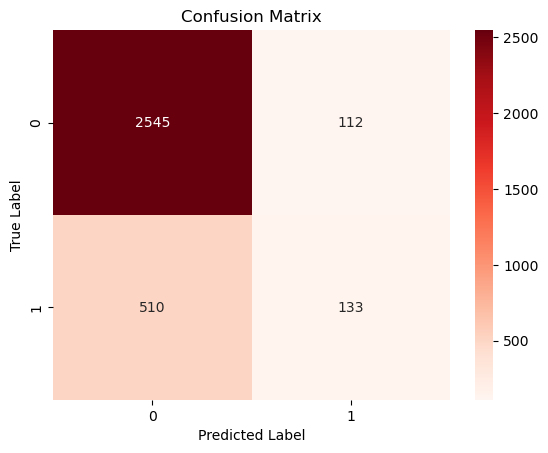

In [137]:
lr_cm = confusion_matrix(y_test, lr_pred_test)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

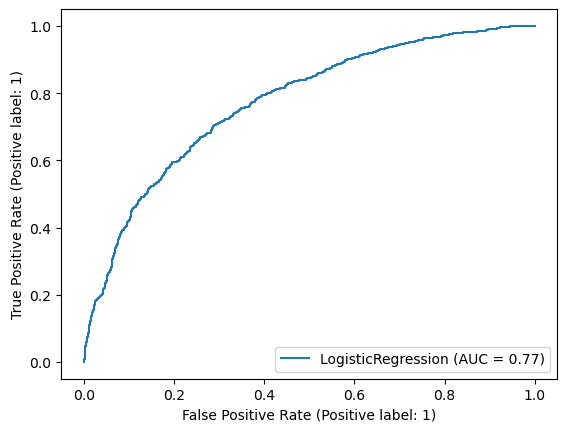

In [138]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

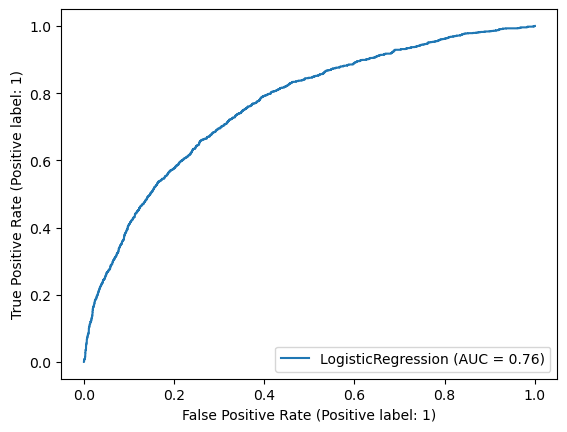

In [139]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

## Сравнительный анализ

In [140]:
# Построим отдельный датафрейм, где будем хранить различные метрики, чтобы потом их сравнить
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy", "Error Rate", "Precision", "Recall", "AUC Score"]
log = pd.DataFrame(columns=log_cols)

# Заполняем таблицу метриками
log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]
log["Error Rate"] = [knn_error_rate, gnb_error_rate, rfc_error_rate, lr_error_rate]
log["Precision"] = [knn_precision, gnb_precision, rfc_precision, lr_precision,]
log["Recall"] = [knn_recall, gnb_recall, rfc_recall, lr_recall]

# Выводим
log

,Classifier,Accuracy,Error Rate,Precision,Recall,AUC Score
0,KNeighborsClassifier,0.769091,0.230909,0.255144,0.096423,NaN
1,Gaussian Naive Bayes,0.793939,0.206061,0.366906,0.079316,NaN
2,Random Forest Classifier,0.871212,0.128788,0.804469,0.447900,NaN
3,Logistic Regression,0.811515,0.188485,0.542857,0.206843,NaN


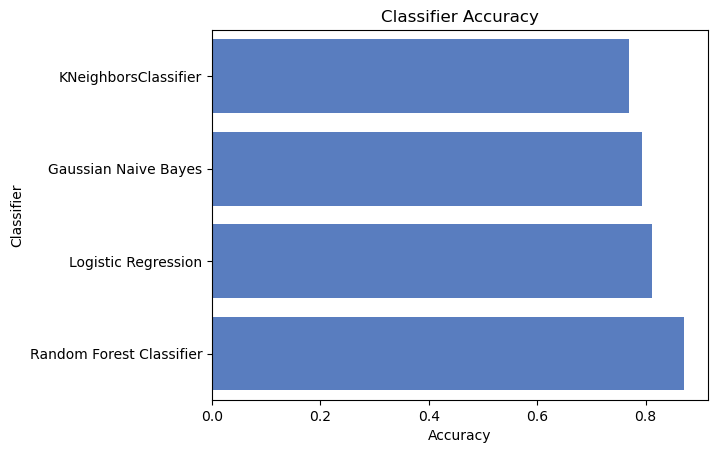

In [141]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

### Обучив модели и совершив прогнозирование, а также с помощью метрик классификаций, выяснили о наиболее точной - Random Forest Classifier